In [43]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

# AFL load

In [93]:
exec_name = 'objdump'
path = '/home/david/Documents/gits/CuriousAFL/test/'
aflpath = os.path.join(path, exec_name + '-afl')

In [94]:
dffinal = pd.DataFrame()
for trial in ['','1','2']:
    aflpath = os.path.join(path, exec_name + '-afl' + str(trial))
    df = pd.read_csv(aflpath+'/afl_out/plot_data')
    df['date'] = pd.to_datetime(df['# unix_time'],unit='s')
    df['delta_time'] = df['date']-df['date'][0]
    df = df.set_index('delta_time').resample('5T').mean().dropna().reset_index()
    df = df[['delta_time', ' paths_total']]
    df = df.rename(columns={' paths_total': 'cur_path'})
    dffinal = dffinal.append(df)

In [95]:
dffinal['event'] = 'AFL'

# Curious load

In [96]:
exec_name = 'objdump'
curiouspath = '/home/david/Documents/gits/fuzztestbench/objdump/'


In [97]:
df = pd.read_csv(curiouspath+'/afl_out/plot_data')
df['date'] = pd.to_datetime(df['# unix_time'],unit='s')
df['delta_time'] = df['date']-df['date'][0]
df = df.set_index('delta_time').resample('5T').mean().dropna().reset_index()
df = df[['delta_time', ' paths_total']]
df = df.rename(columns={' paths_total': 'cur_path'})

In [98]:
df['event'] = 'CuriousAFL'
dffinal = dffinal.append(df)

In [67]:
dffinal

,delta_time,cur_path,event
0,00:00:00,115.586207,AFL
1,00:05:00,275.903846,AFL
2,00:10:00,399.215686,AFL
3,00:15:00,548.632653,AFL
4,00:20:00,717.478261,AFL
5,00:25:00,834.692308,AFL
6,00:30:00,954.733333,AFL
7,00:35:00,1035.272727,AFL
8,00:40:00,1116.042553,AFL
9,00:45:00,1187.375000,AFL


sidenote regarding seaborn https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial  
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:  
-> set it to standard deviation

In [99]:
dffinal['delta_time'] = dffinal['delta_time'].dt.total_seconds() / 3600

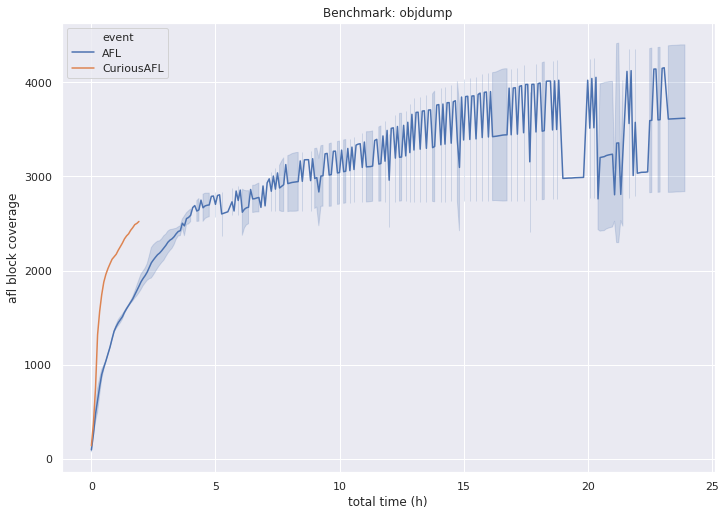

In [103]:
ax = sns.lineplot(x="delta_time", y="cur_path", hue='event', ci='sd',data=dffinal)
ax.set(xlabel='total time (h)', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.savefig('./'+exec_name+'24h.png', dpi = 200)